In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Read Data

In [36]:
file_path = "data.csv"
df = pd.read_csv(file_path).sample(
    n=10000
)  # Using CPU to process all the data is a nightmare! So just using a sample.

df.shape

(10000, 22)

### Basic Statistical Information

In [37]:
df.describe()

,id,Monsoon Intensity,Terrain Drainage,River Management,Deforestation,rbanization,Climate Change,Dam Quality,Sedimentation,Agricultural Practices,...,Drainage System,Coastal Vulnerability,Landslide,Watershed,Infrastructure Deterioration,Population Score,Wetland Loss,Inadequate Planning,Policy Factors,Flood Probability
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.290357e+05,4.870500,4.907200,4.968800,4.896300,4.928400,4.88550,4.94790,4.881800,4.946600,...,4.959900,4.92230,4.918800,4.952500,4.894200,4.885600,4.941400,4.925400,4.938300,0.502706
std,3.025063e+05,1.956301,2.022127,2.031315,1.978772,2.016304,1.97139,2.04152,1.975707,2.041413,...,1.999573,2.04902,2.012066,2.056469,1.988417,2.001927,2.025087,2.047939,2.054146,0.049519
min,1.810000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355000
25%,2.666788e+05,3.000000,4.000000,4.000000,4.000000,4.000000,3.00000,4.00000,3.000000,4.000000,...,4.000000,3.00000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,0.470000
50%,5.285900e+05,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.502500
75%,7.925728e+05,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.00000,6.000000,6.000000,...,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.535000
max,1.048552e+06,10.000000,11.000000,11.000000,10.000000,11.000000,10.00000,11.00000,10.000000,11.000000,...,11.000000,11.00000,11.000000,11.000000,10.000000,10.000000,11.000000,11.000000,11.000000,0.650000


### Preparing the Data

In [38]:
target_column = "Flood Probability"

X = df.drop(["id", target_column], axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training

In [39]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

### Sorting by the Importances of each Feature

In [40]:
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": rf_model.feature_importances_}
).sort_values("importance", ascending=False)

feature_importance.style.format({"importance": "{:.4f}"}).background_gradient(
    cmap="coolwarm"
)

,feature,importance
19,Policy Factors,0.0561
10,Ineffective Disaster Prevention,0.0545
13,Landslide,0.0544
17,Wetland Loss,0.0535
5,Climate Change,0.0531
7,Sedimentation,0.0510
8,Agricultural Practices,0.0510
2,River Management,0.0510
14,Watershed,0.0500
1,Terrain Drainage,0.0500


### Barplot of Importances

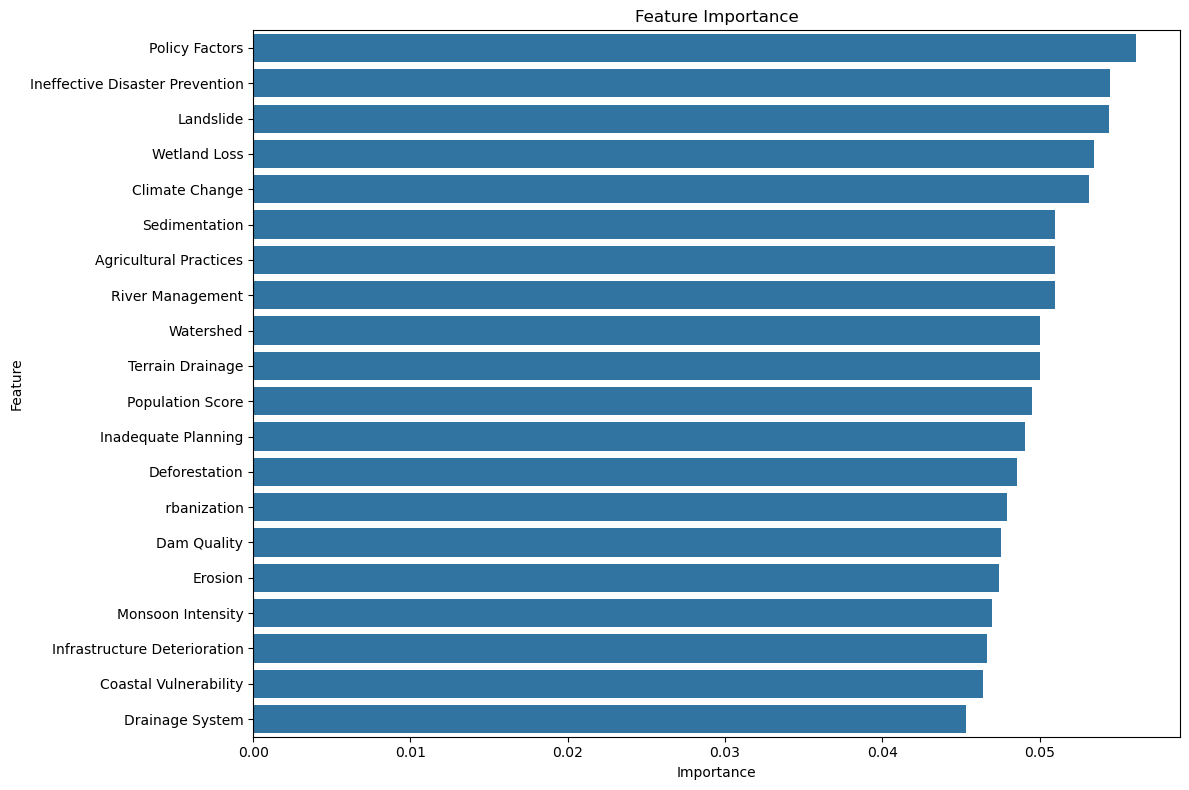

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Distribution of Importances

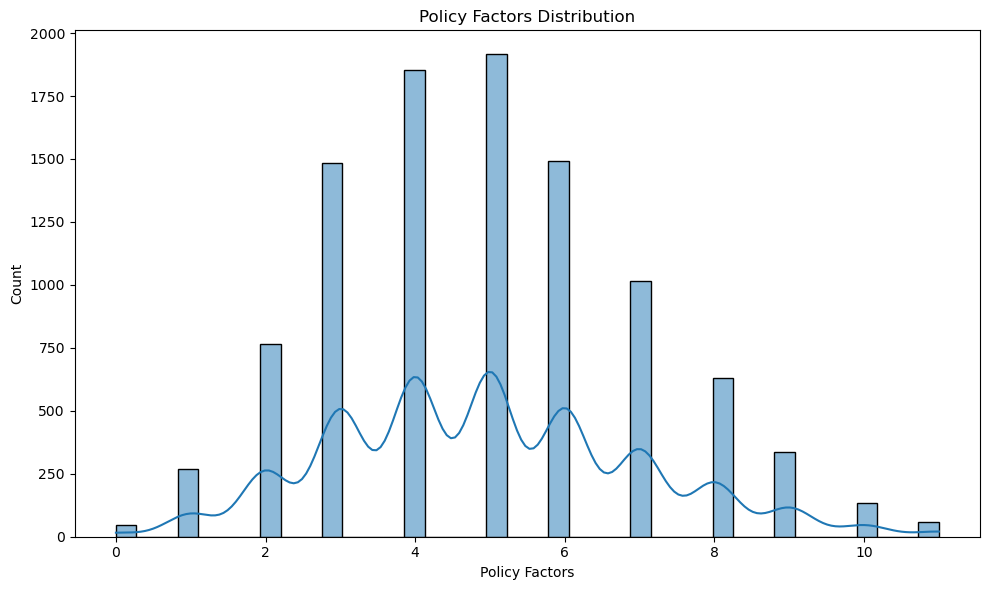

In [42]:
most_important_feature = feature_importance["feature"].iloc[0]
plt.figure(figsize=(10, 6))
sns.histplot(df[most_important_feature], kde=True)
plt.title(f"{most_important_feature} Distribution")
plt.tight_layout()
plt.show()

### Scatter Plot between Most Important Feature and Flood

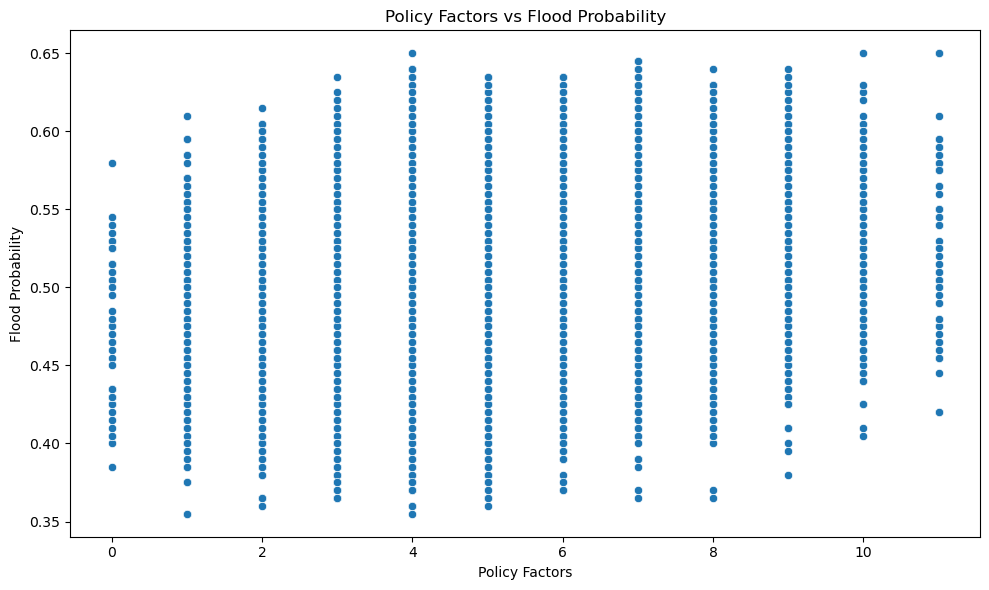

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=most_important_feature, y=target_column)
plt.title(f"{most_important_feature} vs {target_column}")
plt.tight_layout()
plt.show()